In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
df = pd.read_csv("gss2012.csv")

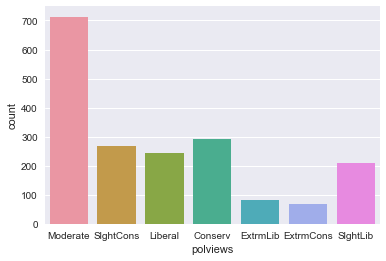

In [4]:
sns.set(style = "darkgrid")
polviews = sns.countplot(x = "polviews", data = df) 
#The largest subgroup in respondents hold moderate political views

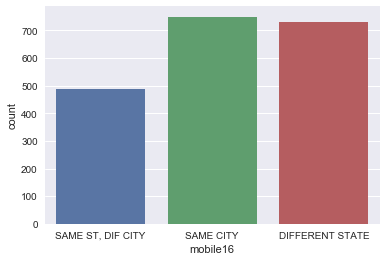

In [5]:
mobile16 = sns.countplot(x = "mobile16", data = df)
#A large portion of the respondents move to a different state after 16 years old

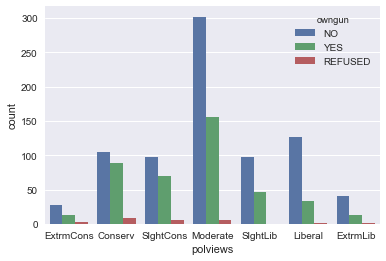

In [6]:
polview_order =  ["ExtrmCons", "Conserv",\
"SlghtCons", "Moderate", "SlghtLib", "Liberal", "ExtrmLib"]
own_gun_polview = sns.countplot(x = "polviews", hue = "owngun", data = df, order = polview_order)
#The propotion of gunowners is higher among conservatives

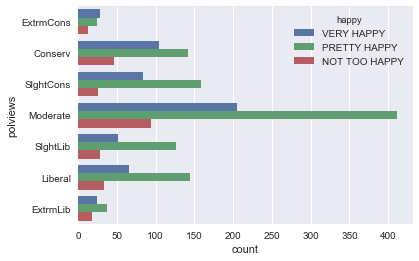

In [87]:
happy_polview = sns.countplot(y = "polviews", hue = "happy", data  = df, order = polview_order)
#The propotion of very happy respondents is higher among conservatives compared with liberals

In [8]:
from ggplot import *

/Users/Nancygong/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/Nancygong/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/Nancygong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


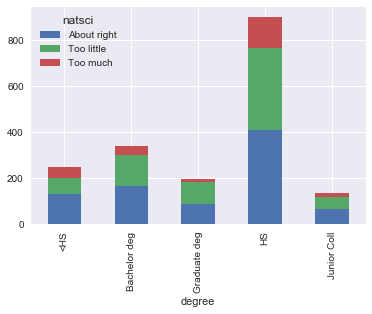

In [9]:
natsci_degree = df.groupby(["degree", "natsci"]).size()
natsci_degree.unstack().plot(kind = 'bar', stacked = True)
#Respondents with higher degrees such as 

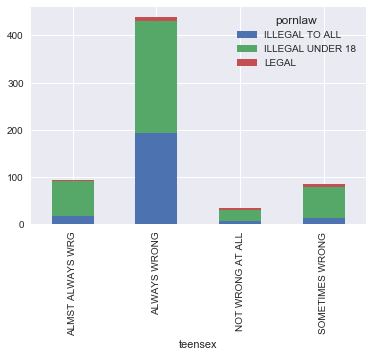

In [91]:
teensex_pornlaw = df.groupby(["teensex", "pornlaw"]).size()
teensex_pornlaw.unstack().plot(kind = 'bar', stacked = True)

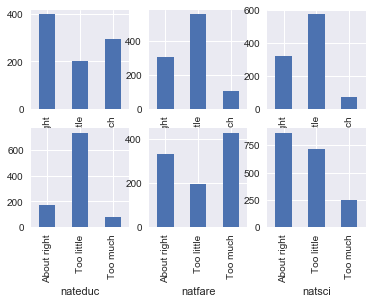

In [62]:
#Respondents' view on government's spending(one part)
plt.figure()
l = [ "natspac", "natenvir", "natcrime", "nateduc", "natfare", "natsci"]
for i in range(len(l)):
    plt.subplot(2, 3, i+1)
    subgroup = df.groupby([l[i]]).size()
    subgroup.plot(kind = 'bar')
#The majority of respondents think that the government spend too little on protecting environment, reducing crime,
#improving education. Surprisingly, a large proportion thinks that the government spend too much on welfare.


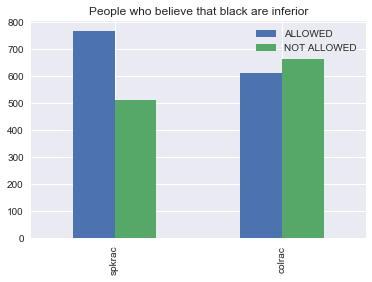

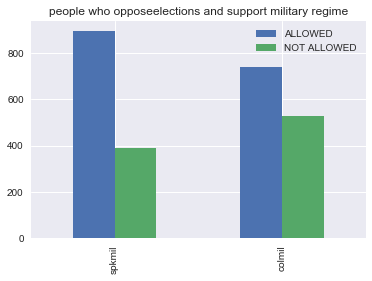

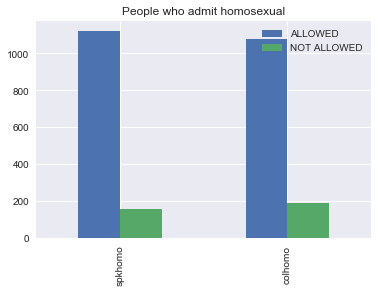

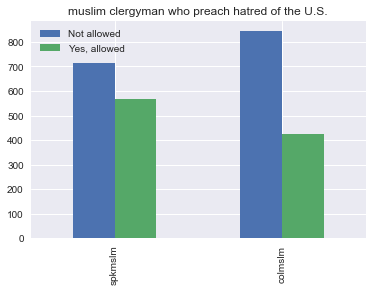

In [10]:
#Respondents' attitudes towards minority people who hold have different views
plt.figure()
question = {"People who believe that black \
are inferior":["spkrac", "colrac"], "people who oppose\
elections and support military regime":["spkmil", "colmil"], "People who admit homosexual":["spkhomo", "colhomo"],\
"muslim clergyman who preach hatred of the U.S.":["spkmslm", "colmslm"]}
for k, v in question.items():
    #plt.subplot(2, 2, i)
    a = df.groupby(v[0]).size()
    b = df.groupby(v[1]).size()
    c = pd.concat([a, b], axis = 1)
    c.columns = [v[0], v[1]]
    c.transpose().plot(kind = "bar", title = k)
# Almost equal propotion of respondents allow or not allow people who believe that black are inferior \
# to teach in college. Respondents support homosexual men a lot. (How about homosexual women?). Most respondents
# don't support free speech or college duties for muslim clergyman who hate U.S.


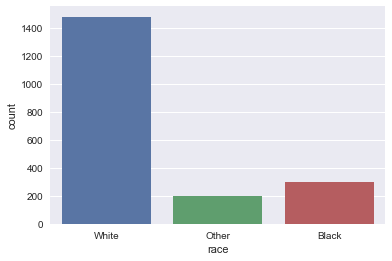

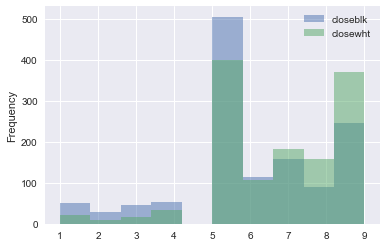

In [11]:
# How close you feel about black people and white people 
a = sns.countplot(x = "race", data = df)
df1 = pd.concat([df["closeblk"], df["closewht"]], axis = 1)
#plt.figure()
df1.plot.hist(alpha = 0.5)
#The majority of respondents are white people. The average score is higher for white people 

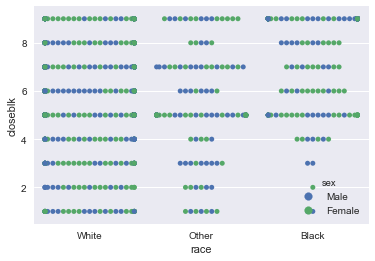

In [12]:
sns.swarmplot(x = "race", y = "closeblk",hue = "sex", data = df)
#How different races feel whether close to black people or not

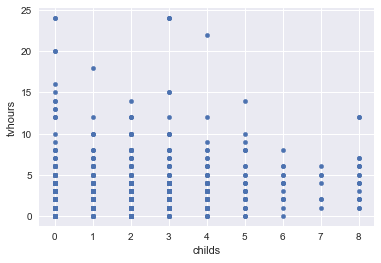

In [13]:
df.plot.scatter(x = "childs", y = "tvhours")
#When there are many children, not many respondents watch time for over 10 hours; some outliers are 
#among respondents who have three or four children.

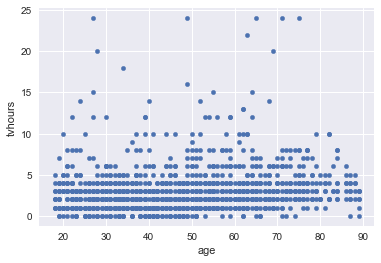

In [14]:
df.plot.scatter(x = "age", y = "tvhours")
#The hours of watching TV for different ages

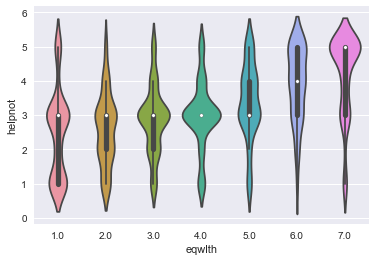

In [15]:
sns.violinplot(x = "eqwlth", y = "helpnot", data= df)
#people who think that the government shouldn't reduce income difference
#also think that the government is doing too much to solve the country's problem

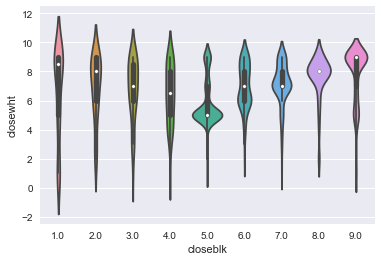

In [16]:
sns.violinplot(x = "closeblk", y = "closewht", data = df)
#How people with different attitudes to black people feel about white people

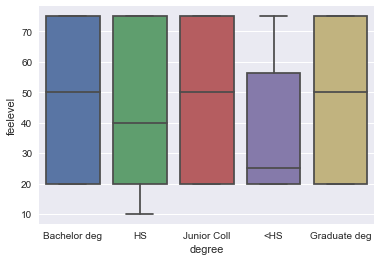

In [17]:
ax = sns.boxplot(x = "degree", y = "feelevel", data = df)
#Interview fees paid to respondents with different degrees

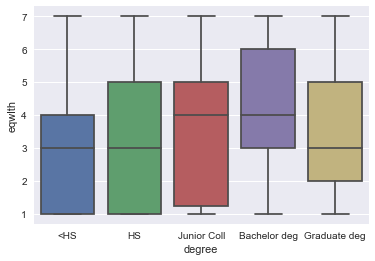

In [18]:
degree_order = ["<HS","HS","Junior Coll", "Bachelor deg","Graduate deg"]
ax = sns.boxplot(x = "degree", y = "eqwlth", data = df,order = degree_order)
#The more education you receive, the more likely that you will not support that the government should reduce
#income differences

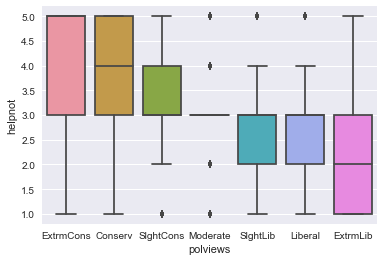

In [19]:
ax = sns.boxplot(x = "polviews", y = "helpnot", order = polview_order, data = df)
#conservatives tend to think that government is doing too much to solve the country's problem
#while liberals think that the government should do more.
#There are some outliers between slight conservatives and liberals 

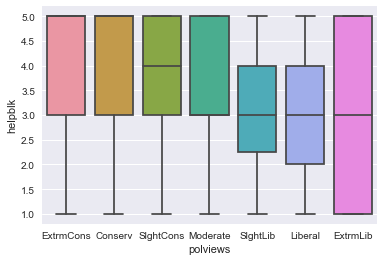

In [20]:
sns.boxplot(x = "polviews", y = "helpblk", order = polview_order, data = df)
#Liberals tend to think that government shouldnot give black people special treatment

In [21]:
def get_income_mean(x):
    z = []
    if type(x) != float:
        m = x.split(" ")
        for v in m:
            q = v.strip("$")
            if q.isdigit():
                z.append(float(q))
    else:
        z.append(float(x))

    return sum(z)/len(z)

In [22]:
df["resp_income"] = df["rincom06"].apply(get_income_mean)
df["family_income"] = df["income06"].apply(get_income_mean)

In [ ]:
#Investigating income 

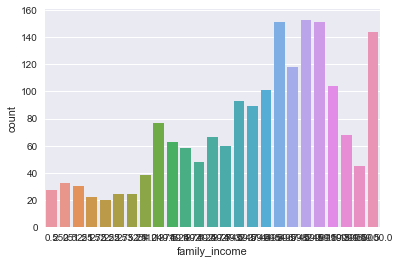

In [123]:
sns.countplot(x = "resp_income", data = df)
#Income distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c162e8240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c164bc3c8>]], dtype=object)

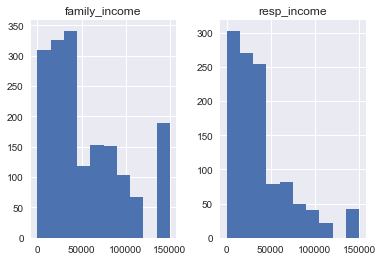

In [23]:
pd.DataFrame.hist(df, column = ["resp_income", "family_income"])
#Income histograms for individual respondents and respondents' families

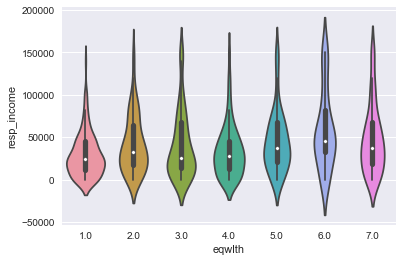

In [24]:
sns.violinplot(x = "eqwlth", y = "resp_income", data = df)
#Income distributino by people's views on government's role in reducing income gaps

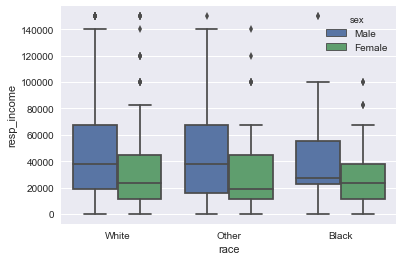

In [25]:
sns.boxplot(x = "race", y = "resp_income", hue = "sex", data = df)
#Income distribution by race

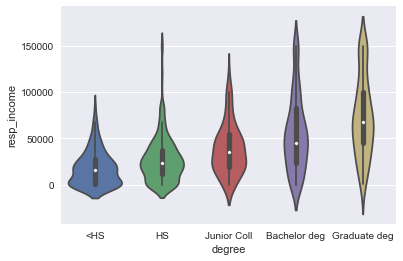

In [26]:
sns.violinplot(x = "degree", y = "resp_income", data = df, order = degree_order)
#Income distribution by degree

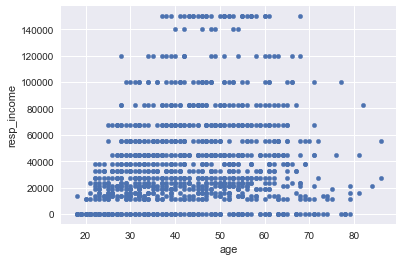

In [27]:
ax = df.plot.scatter(x = "age", y = "resp_income")
#Income scatter plot against age

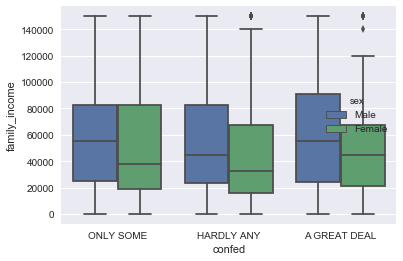

In [28]:
sns.boxplot(x = "confed", y = "family_income", hue = "sex", data = df)
#Income distribution by different levels of confidence in federal governments

In [29]:
#Education
def importance_to_num(x):
    if x == 'MOST IMPORTANT':
        return 1
    elif x == '2ND IMPORTANT':
        return 2
    elif x == '3RD IMPORTANT':
        return 3
    elif x == '4TH IMPORTANT':
        return 4
    elif x == 'LEAST IMPORTANT':
        return 5

obeynew
popularnew
thnkselfnew
workhardnew
helpothnew


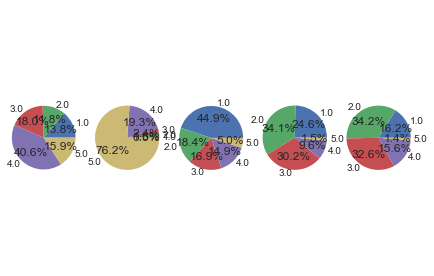

In [125]:
fig = plt.figure()
edu_q = ["obey", "popular", "thnkself","workhard","helpoth"]
edu_q_new =  ["obeynew", "popularnew", "thnkselfnew","workhardnew","helpothnew"]
l = []
name = []
for v in edu_q:
    df[v+"new"] = df[v].apply(importance_to_num)
    b = df.groupby([v + "new"]).size()
    l.append(b)
    name.append(v+"new")
df3 = pd.concat(l, axis = 1, names = ["importance"])
df3.columns = name
i = 1
for n in name:
    plt.subplot(1, 5, i)
    plt.pie(df3[n], labels = df3.index,autopct='%1.1f%%')
    plt.axis("equal")
    i +=1
    print(n)
plt.tight_layout()

#df3.plot.pie(subplots = True, figsize = (6,6))
#Importance rankings in different aspects

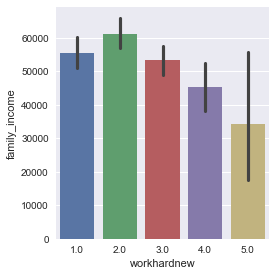

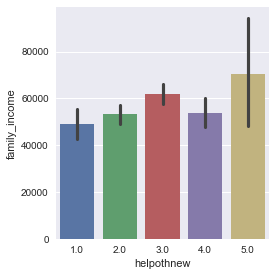

In [126]:
g = sns.factorplot(x = "workhardnew", y = "family_income",data = df, kind = "bar")
h = sns.factorplot(x = "helpothnew", y = "family_income",data = df, kind = "bar")
#Family income by importance of hard working in child education
#Family income by importance of helping others in child education 

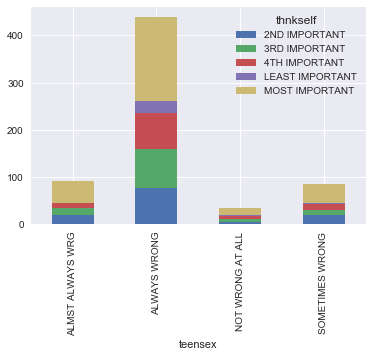

In [88]:
teensex_thnself = df.groupby(["teensex", "thnkself"]).size()
teensex_thnself.unstack().plot(kind = 'bar', stacked = True)
#Importance levels among different education aspects by teensex

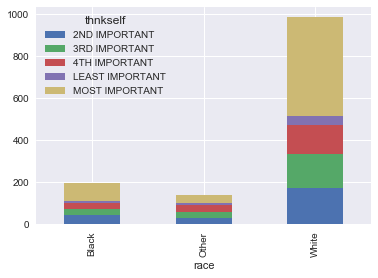

In [90]:
teensex_thnself = df.groupby(["race", "thnkself"]).size()
teensex_thnself.unstack().plot(kind = 'bar', stacked = True)
#Importance levels among different education aspects by race

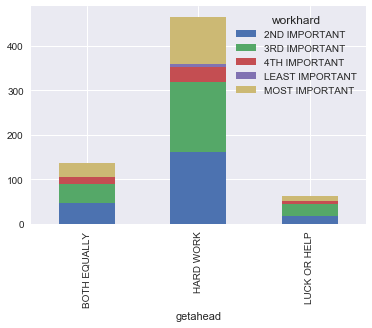

In [97]:
getahead_workhard = df.groupby(["getahead", "workhard"]).size()
getahead_workhard.unstack().plot(kind = 'bar', stacked = True)
#Importance levels among 

In [ ]:
#women's rights

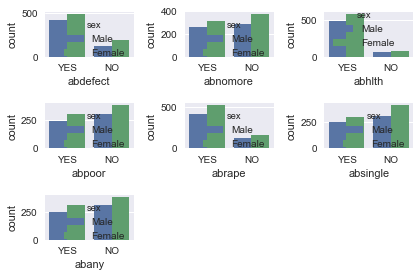

In [111]:
fig = plt.figure()
plt.subplot(3,3,1)
abdefect = sns.countplot(x = "abdefect", data = df, hue = "sex")
plt.subplot(3, 3,2)
sns.countplot(x = "abnomore", data = df, hue = "sex")
plt.subplot(3, 3, 3)
abhlth = sns.countplot(x = "abhlth", data = df, hue = "sex")
plt.subplot(3, 3, 4)
abpoor = sns.countplot(x = "abpoor", data = df, hue = "sex")
plt.subplot(3, 3, 5)
abrape = sns.countplot(x = "abrape", data = df, hue = "sex")
plt.subplot(3, 3, 6)
absingle = sns.countplot(x = "absingle", data = df, hue = "sex")
plt.subplot(3, 3, 7)
abany = sns.countplot(x = "abany", data = df, hue = "sex")
plt.tight_layout()


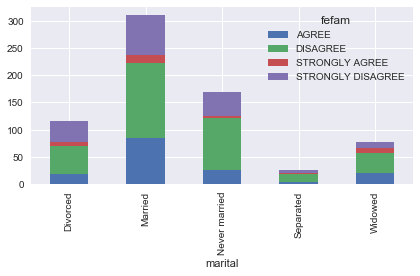

In [120]:
df6 = df[df["sex"]== "Female"]
marital_fefam = df6.groupby(["marital", "fefam"]).size()
marital_fefam.unstack().plot(kind = 'bar', stacked = True)
plt.tight_layout()
